In [2]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [3]:
import os
from langchain.chat_models import init_chat_model

# os.environ["GOOGLE_API_KEY"] = "..." # add key if not available in environment

llm = init_chat_model("google_genai:gemini-2.0-flash")

In [4]:
def chatbot(state: State):
    print(state["messages"])
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [5]:
graph_builder.add_edge(START, "chatbot")


In [6]:
graph = graph_builder.compile()


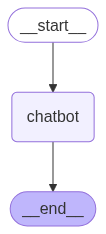

In [7]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [8]:
def stream_graph_updates(user_input: str):
    
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

[HumanMessage(content='what is chocolate', additional_kwargs={}, response_metadata={}, id='a7ef8c09-8726-4892-ad36-946ae3cd9868')]
Assistant: Chocolate is a food product made from roasted and ground cacao seeds, that is available as a liquid, solid or paste, on its own or as a flavoring agent in other foods. Here's a breakdown of what it is and how it's made:

**Key Components and Ingredients:**

*   **Cacao Beans:** The foundation of chocolate. These beans grow in pods on the cacao tree (Theobroma cacao).
*   **Cocoa Solids:** This refers to the non-fat components of the cacao bean, including cocoa mass, cocoa powder, and cocoa nibs. They contribute the characteristic chocolate flavor and color.
*   **Cocoa Butter:** The natural fat extracted from cacao beans. It gives chocolate its smooth texture and contributes to its melt-in-your-mouth quality.
*   **Sugar:** Added for sweetness and to balance the bitterness of the cocoa solids.
*   **Other Ingredients:** Depending on the type of c

In [ ]:
graph_builder.

__main__.State['add_messages']